<a href="https://colab.research.google.com/github/maverick98/Coursera/blob/master/mfml_assign2_gd_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-7fbd0bf1d6f0>:83: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i][j] = C(np.array([X[i][j],Y[i][j]]).reshape(2,1))


GD Start Point: [[-1.8218]
 [-4.9994]] [[61.35110741]]
Num steps: 188
Converged Point: [[-6.49857316e-24]
 [-3.17760000e+00]] [[40.18131963]]


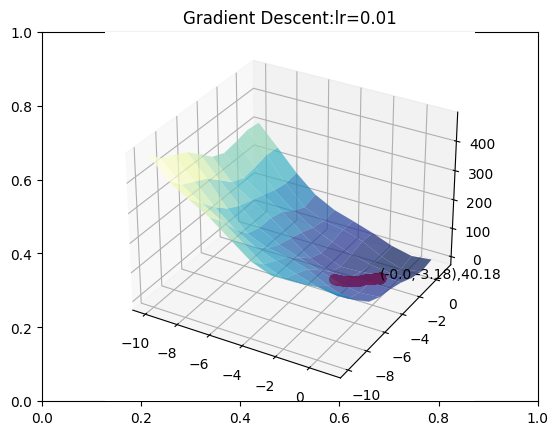

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

##### To be Updated #####
# e.g.,if your BITS email id is 023ab12345@wilp.bits-pilani.com
# update the below line as student_id = "023xx12345"
student_id = "2023aa05738"
#########################

student_id = ''.join([i for i in student_id if i.isdigit()])
random.seed(student_id)

# set the number of iterations and learning rate
iters = random.randint(100,300)
learning_rate = 0.01

# Evaluate the function at x
def C(x):
    ##### To be Updated #####
    # NOTE: return value of this function  will
    #   **ALSO** change for Q4 of the assignment
    #########################
    return (x.T@np.array([[3,0],[0,2]])@x)-20*np.cos(x[0])*np.cos(x[1])

# Evaluate the gradient of function at x
def dC(x):
    ##### To be Updated #####
    # 1. Compute and return the gradient
    dc_x=6*x[0]-20*np.sin(x[0])*np.cos(x[1])
    dc_y=4*x[1]-20*np.cos(x[0])*np.sin(x[1])
    return np.array([dc_x, dc_y])
    #########################


def plot_grad_change(X,Y,Z, c, grad_xs0, grad_xs1, grad_ys):
    fig = plt.figure()
    title_str = "Gradient Descent:"+"lr="+str(learning_rate)
    plt.title(title_str)
    ax = fig.add_subplot(projection='3d')

    ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r,alpha=0.7)
    for i in range(len(grad_xs0)):
        ax.plot([grad_xs0[i]],[grad_xs1[i]], grad_ys[i][0], markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)
    ax.text(grad_xs0[-1],grad_xs1[-1],grad_ys[-1][0][0],
                 "("+str(round(grad_xs0[-1],2))+","+
                     str(round(grad_xs1[-1],2))+"),"+
                     str(round(grad_ys[-1][0][0],2)))
    plt.show()

def GD(start,x,y,z, c, dc, iters, eta):
    px = start.astype(float)
    py = c(px).astype(float)
    print("GD Start Point:",px,py)
    print("Num steps:",iters)
    grad_xs0, grad_xs1, grad_ys = [px[0][0]], [px[1][0]], [py]

    for iter in range(iters):
        ##### To be Updated #####
        # 2. Update px using gradient descent
        dc_x=dc(px)
        px = px - eta*dc_x[0]
        # 3. Update py
        py = c(px).astype(float)
        #########################
        grad_xs0.append(px[0][0])
        grad_xs1.append(px[1][0])
        grad_ys.append(py)
    print("Converged Point:",px,py)
    plot_grad_change(x,y,z, c, grad_xs0,grad_xs1, grad_ys)


lo = -10
hi = 10
x1 = round(random.uniform(lo,0),4)
x2 = round(random.uniform(lo,0),4)
x = np.linspace(lo, 1, hi)
y = np.linspace(lo, 1, hi)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i][j] = C(np.array([X[i][j],Y[i][j]]).reshape(2,1))
# start Gradient Descent
GD(np.array([x1,x2]).reshape(2,1),X,Y,Z, C, dC, iters, learning_rate)
